<a href="https://colab.research.google.com/github/Liso15/Projects/blob/main/Neural_network_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libaries

import numpy as np
import pandas as pd
import talib

In [ ]:
# Setting the random seed to a fixed number

import random

# Setting the random seed to a fixed number

import random

random.seed(42)
import os

In [ ]:
pwd = os.getcwd()

In [ ]:
# get the data

pt = pd.read_csv(pwd + "/EURUSD.csv",index_col=[0], parse_dates=[0])
pt


,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
1980-01-02,1.14370,1.14570,1.14130,1.14370,881,50,0
1980-01-03,1.14200,1.14320,1.14110,1.14200,421,50,0
1980-01-04,1.14270,1.14310,1.14190,1.14240,211,50,0
1980-01-07,1.14530,1.14530,1.14520,1.14520,11,50,0
1980-01-08,1.14110,1.14160,1.14020,1.14080,251,50,0
...,...,...,...,...,...,...,...
2023-01-04,1.05449,1.06347,1.05398,1.06016,784333,5,117649950000
2023-01-05,1.06001,1.06307,1.05145,1.05206,771264,5,115689600000
2023-01-06,1.05188,1.06475,1.04814,1.06441,767724,5,115158600000


In [ ]:
pt.drop(columns=["tick_volume","spread","real_volume"], inplace=True )
pt

,open,high,low,close
time,,,,
1980-01-02,1.14370,1.14570,1.14130,1.14370
1980-01-03,1.14200,1.14320,1.14110,1.14200
1980-01-04,1.14270,1.14310,1.14190,1.14240
1980-01-07,1.14530,1.14530,1.14520,1.14520
1980-01-08,1.14110,1.14160,1.14020,1.14080
...,...,...,...,...
2023-01-04,1.05449,1.06347,1.05398,1.06016
2023-01-05,1.06001,1.06307,1.05145,1.05206
2023-01-06,1.05188,1.06475,1.04814,1.06441


Preparing the dataset

In [ ]:
# Preparing the dataset

pt['h-l'] = pt['high'] - pt['low']
pt['o-c'] = pt['close'] - pt['open']
pt['3day MA'] = pt['close'].shift(1).rolling(window = 3).mean()
pt['10day MA'] = pt['close'].shift(1).rolling(window = 10).mean()
pt['30day MA'] = pt['close'].shift(1).rolling(window = 30).mean()
pt['Std_dev']= pt['close'].rolling(5).std()
pt['RSI'] = talib.RSI(pt['close'].values, timeperiod = 9)
pt['Williams %R'] = talib.WILLR(pt['high'].values, pt['low'].values, pt['close'].values, 7)

Input features from the dataset

.High minus Low price
.Close minus Open price
.Three day moving average
.Ten day moving average
.30 day moving average
.Standard deviation for a period of 5 days
.Relative Strength Index
.Williams %R

Output value as price rise, which is a binary variable storing 1 when the closing price of tomorrow is greater than the closing price of today.

In [ ]:
pt['Price_Rise'] = np.where(pt['close'].shift(-1) > pt['close'], 1, 0)

# drop NaN value:

pt = pt.dropna()

We creat two dataframes for input and output variable

In [ ]:
X = pt.iloc[: , 4 : -1]
y = pt.iloc[: , -1]

Split data

In [ ]:
# Splitting the dataset
split = int(len(pt)*0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

Data preproccessing (Standardise the dataset)
We use The standardscaler method

In [ ]:
 #Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Build the artificial neural network model

In [ ]:
# Building the Artificial Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Dense(units = 128, kernel_initializer = 'uniform'
, activation = 'relu', input_dim = X.shape[1]))

In [ ]:
classifier.add(Dense(units = 128, kernel_initializer = 'uniform'
, activation = 'relu'))

In [ ]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [ ]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
889/889 [==============================] - 10s 6ms/step - loss: 0.2496 - accuracy: 0.5227
Epoch 2/100
889/889 [==============================] - 6s 6ms/step - loss: 0.2485 - accuracy: 0.5390
Epoch 3/100
889/889 [==============================] - 5s 6ms/step - loss: 0.2486 - accuracy: 0.5355
Epoch 4/100
889/889 [==============================] - 6s 6ms/step - loss: 0.2483 - accuracy: 0.5420
Epoch 5/100
889/889 [==============================] - 6s 6ms/step - loss: 0.2481 - accuracy: 0.5436
Epoch 6/100
889/889 [==============================] - 5s 6ms/step - loss: 0.2478 - accuracy: 0.5470
Epoch 7/100
889/889 [==============================] - 6s 6ms/step - loss: 0.2479 - accuracy: 0.5427
Epoch 8/100
889/889 [==============================] - 5s 6ms/step - loss: 0.2477 - accuracy: 0.5419
Epoch 9/100
889/889 [==============================] - 5s 6ms/step - loss: 0.2475 - accuracy: 0.5461
Epoch 10/100
889/889 [==============================] - 5s 6ms/step - loss: 0.2476 - accur

Set the prediction parameters

In [ ]:
# Predicting the movement of the currency

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

70/70 [==============================] - 1s 4ms/step


In [ ]:
pt['y_pred'] = np.NaN
pt.iloc[(len(pt) - len(y_pred)):,-1:] = y_pred
trade_price_EURUSD = pt.dropna()

C:\Users\Liso\AppData\Local\Temp\ipykernel_13936\3878025093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pt['y_pred'] = np.NaN


Computation of strategy returns and determine trade positions

In [ ]:
# Computing Strategy Returns
trade_price_EURUSD['Tomorrows Returns'] = 0.
trade_price_EURUSD['Tomorrows Returns'] = np.log(trade_price_EURUSD['close']/trade_price_EURUSD['close'].shift(1))
trade_price_EURUSD['Tomorrows Returns'] = trade_price_EURUSD['Tomorrows Returns'].shift(-1)

C:\Users\Liso\AppData\Local\Temp\ipykernel_13936\1816991522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_price_EURUSD['Tomorrows Returns'] = 0.
C:\Users\Liso\AppData\Local\Temp\ipykernel_13936\1816991522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_price_EURUSD['Tomorrows Returns'] = np.log(trade_price_EURUSD['close']/trade_price_EURUSD['close'].shift(1))
C:\Users\Liso\AppData\Local\Temp\ipykernel_13936\1816991522.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [ ]:
trade_price_EURUSD['Strategy Returns'] = 0.
trade_price_EURUSD['Strategy Returns'] = np.where(trade_price_EURUSD['y_pred'] == True,
trade_price_EURUSD['Tomorrows Returns'], - trade_price_EURUSD['Tomorrows Returns'])

C:\Users\Liso\AppData\Local\Temp\ipykernel_13936\2835619888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_price_EURUSD['Strategy Returns'] = 0.
C:\Users\Liso\AppData\Local\Temp\ipykernel_13936\2835619888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_price_EURUSD['Strategy Returns'] = np.where(trade_price_EURUSD['y_pred'] == True,


In [ ]:
# Compute the cumulative returns for both the market and the strategy


trade_price_EURUSD['Cumulative Market Returns'] = np.cumsum(trade_price_EURUSD['Tomorrows Returns'])
trade_price_EURUSD['Cumulative Strategy Returns'] = np.cumsum(trade_price_EURUSD['Strategy Returns'])

C:\Users\Liso\AppData\Local\Temp\ipykernel_13936\1847331431.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_price_EURUSD['Cumulative Market Returns'] = np.cumsum(trade_price_EURUSD['Tomorrows Returns'])
C:\Users\Liso\AppData\Local\Temp\ipykernel_13936\1847331431.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_price_EURUSD['Cumulative Strategy Returns'] = np.cumsum(trade_price_EURUSD['Strategy Returns'])


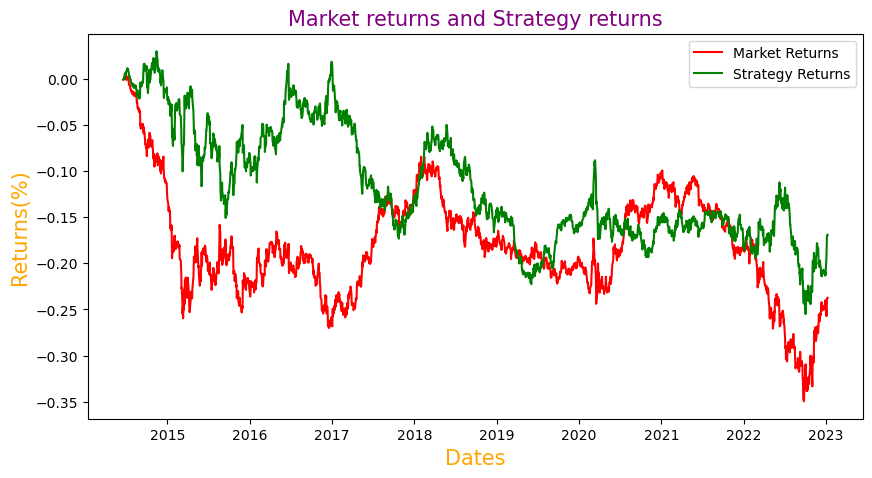

In [ ]:
# Plotting the graph of returns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

plt.plot(trade_price_EURUSD['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(trade_price_EURUSD['Cumulative Strategy Returns'], color='g', label='Strategy Returns')

plt.title('Market returns and Strategy returns', color='purple', size=15)

# Setting axes labels for close prices plot
plt.xlabel('Dates', {'color': 'orange', 'fontsize':15})
plt.ylabel('Returns(%)', {'color': 'orange', 'fontsize':15})

plt.legend()
plt.show()

In [ ]:
import quantstats as qs

                           Strategy
-------------------------  ----------
Start Period               2014-06-19
End Period                 2023-01-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -100.0%
CAGR﹪                     -100.0%

Sharpe                     -49.44
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -3.16
Sortino                    -15.11
Smart Sortino              -0.97
Sortino/√2                 -10.69
Smart Sortino/√2           -0.68
Omega                      0.0

Max Drawdown               -100.0%
Longest DD Days            3102
Volatility (ann.)          91.99%
Calmar                     -1.0
Skew                       0.34
Kurtosis                   0.91

Expected Daily %           -18.25%
Expected Monthly %         -98.65%
Expected Yearly %          -100.0%
Kelly Criterion            -8412.38%
Risk of Ruin               0.0%
Daily Value-at-Risk        -27.58%
Expected Shortfall (cVaR)  -27.58%

Max C

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2014-07-14,2015-07-07,2023-01-10,3102,-100.000000,-100.000000
2,2014-07-03,2014-07-04,2014-07-08,5,-0.119816,-0.094861
3,2014-06-20,2014-06-23,2014-06-24,4,-0.041891,-0.025726
4,2014-07-10,2014-07-10,2014-07-11,1,-0.004410,0.000000


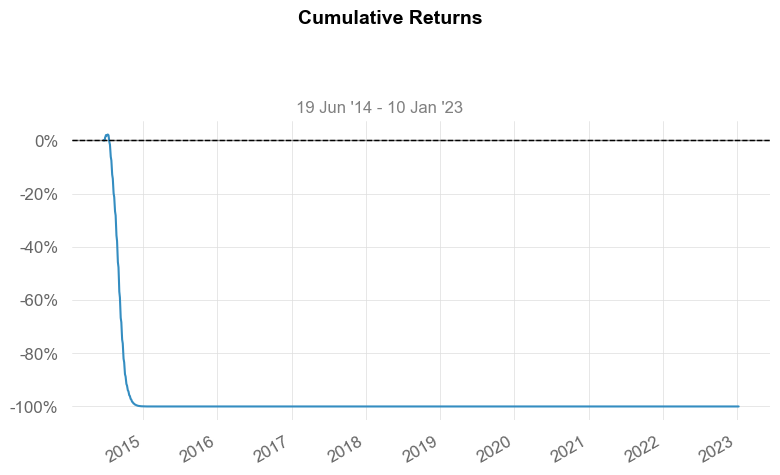

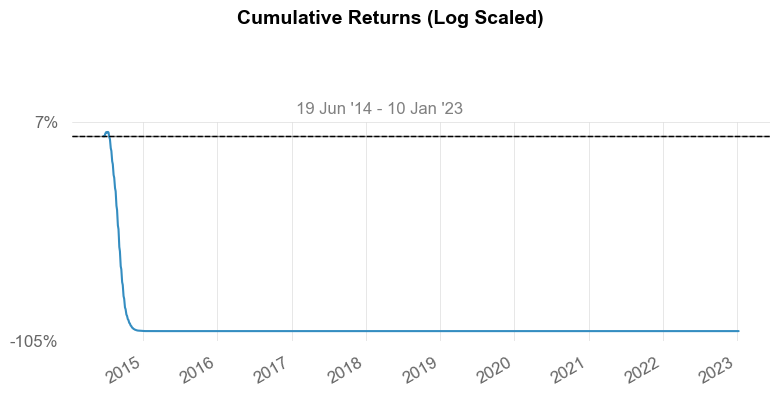

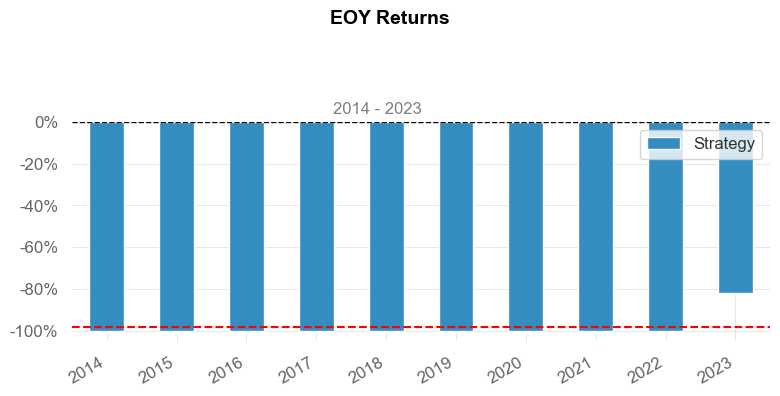

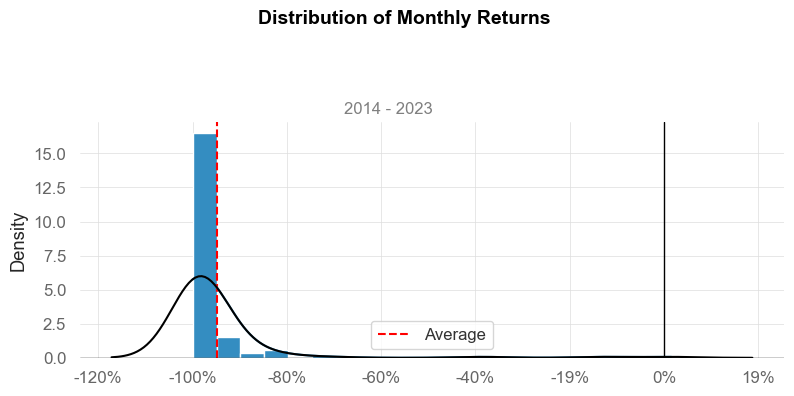

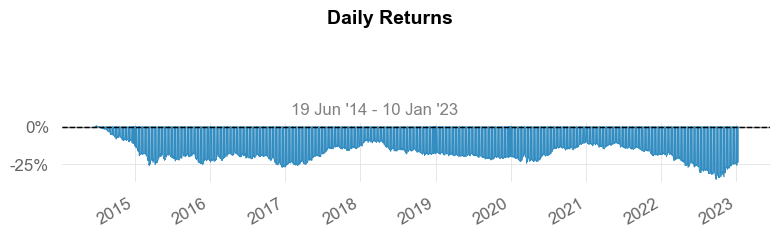

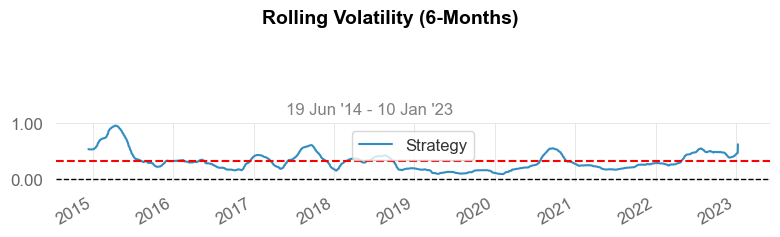

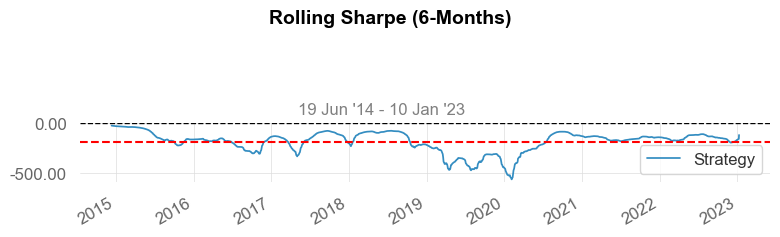

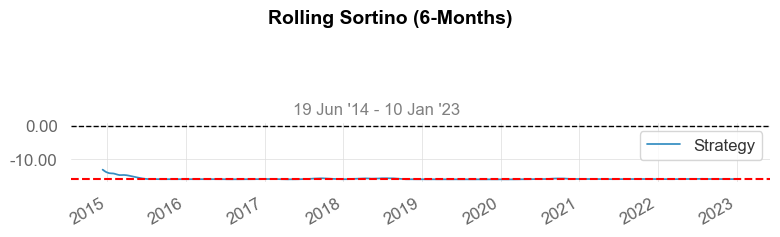

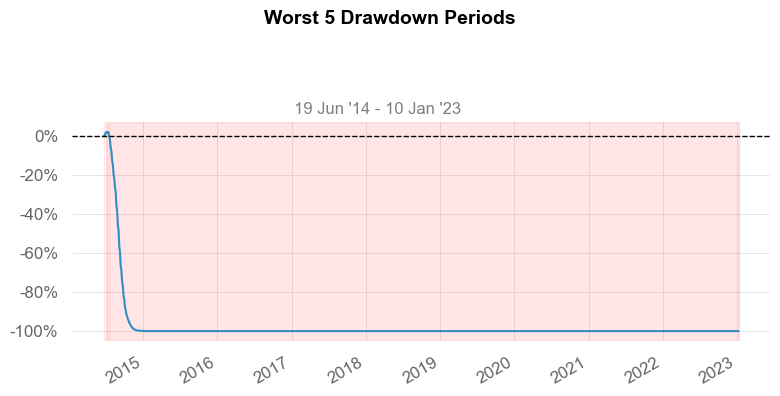

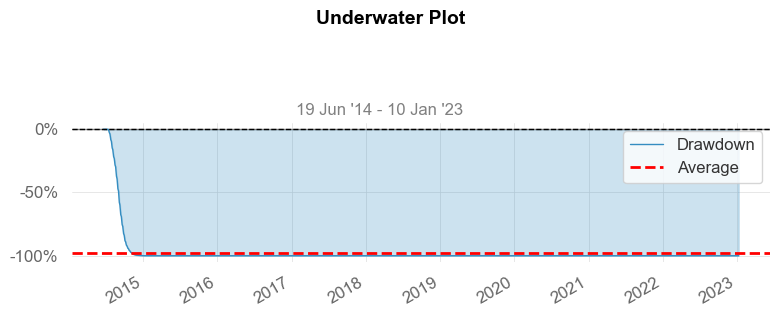

c:\Users\Liso\miniconda3\lib\site-packages\quantstats\stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


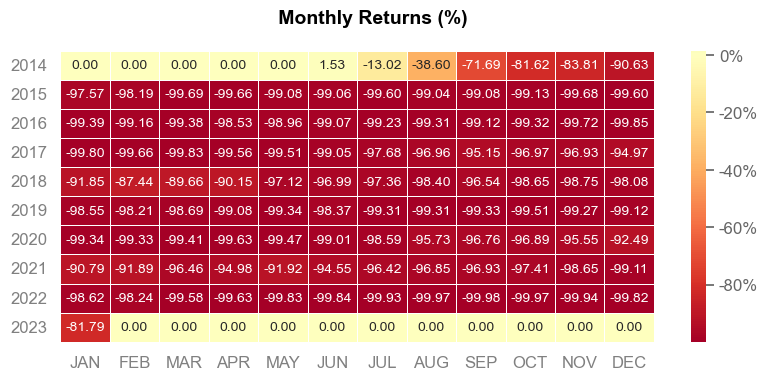

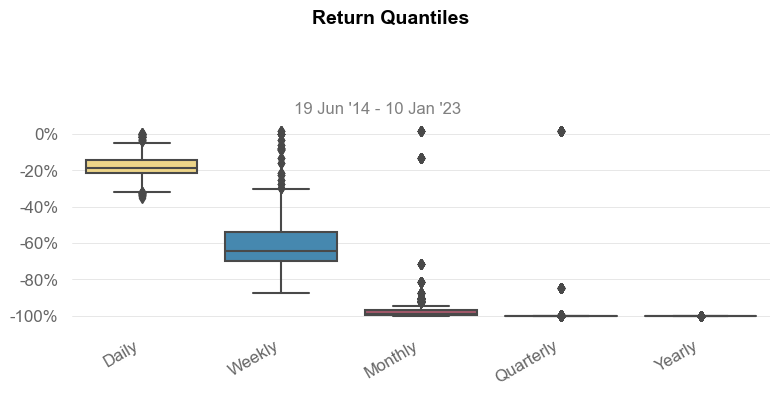

                           Strategy
-------------------------  ----------
Start Period               2014-06-19
End Period                 2023-01-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -100.0%
CAGR﹪                     -100.0%

Sharpe                     -29.54
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -1.54
Sortino                    -13.99
Smart Sortino              -0.73
Sortino/√2                 -9.89
Smart Sortino/√2           -0.52
Omega                      0.0

Max Drawdown               -100.0%
Longest DD Days            2948
Volatility (ann.)          99.36%
Calmar                     -1.0
Skew                       0.42
Kurtosis                   -0.87

Expected Daily %           -11.86%
Expected Monthly %         -93.27%
Expected Yearly %          -100.0%
Kelly Criterion            -1158.53%
Risk of Ruin               0.0%
Daily Value-at-Risk        -21.94%
Expected Shortfall (cVaR)  -21.94%

Max C

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2014-12-15,2017-06-05,2023-01-10,2948,-100.000000,-100.000000
2,2014-07-21,2014-09-15,2014-11-14,116,-31.998220,-31.782351
3,2014-12-02,2014-12-05,2014-12-10,8,-1.414617,-1.348941
4,2014-06-20,2014-06-23,2014-06-24,4,-0.041891,-0.025726


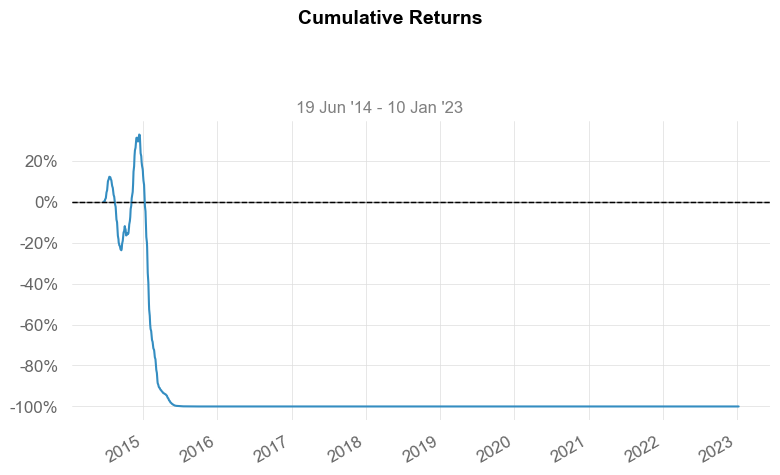

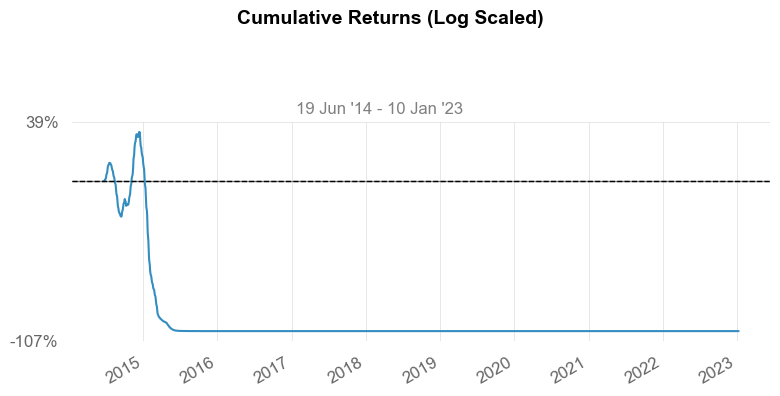

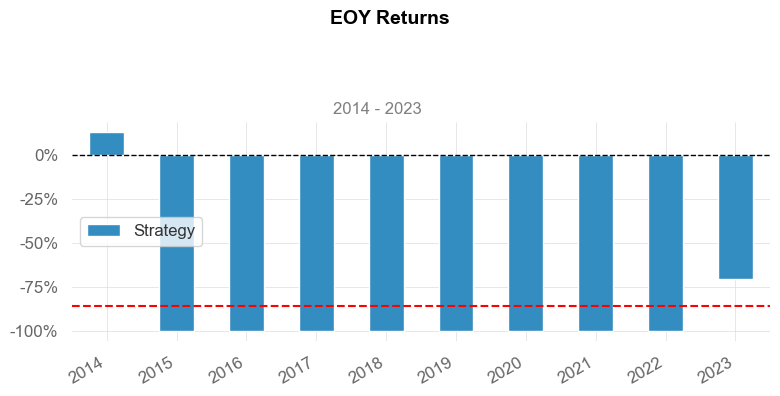

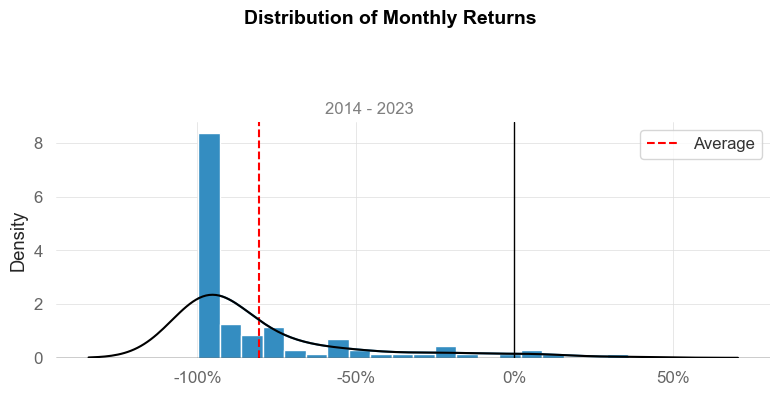

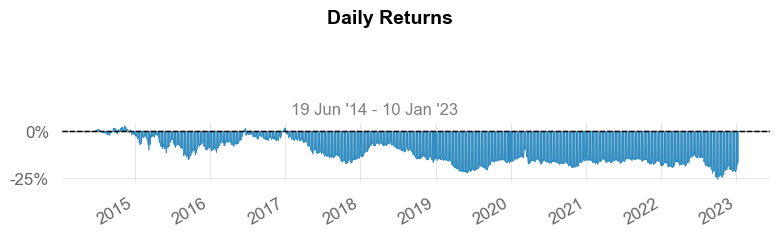

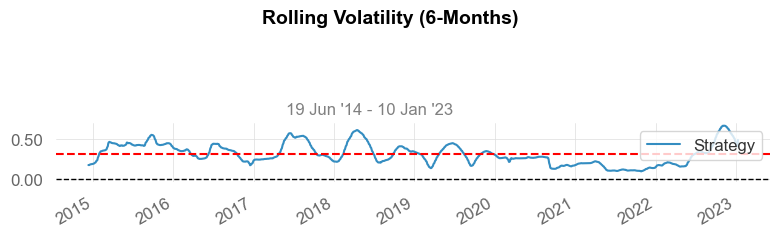

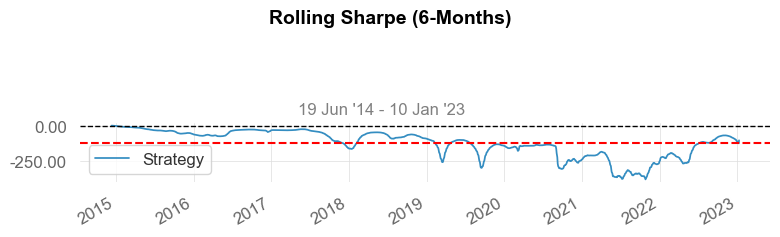

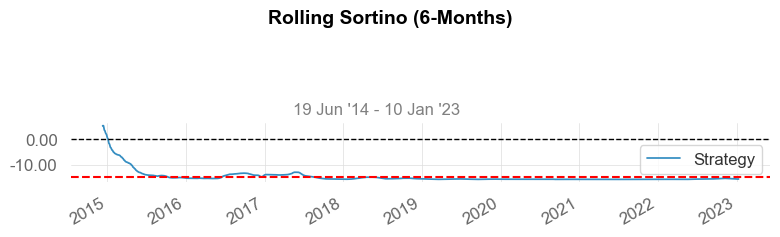

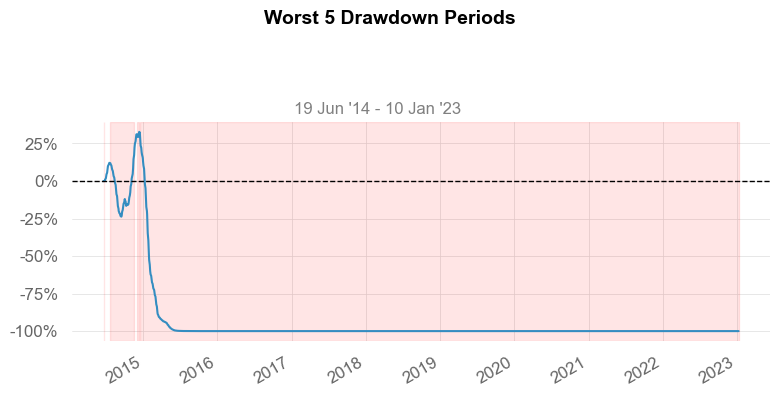

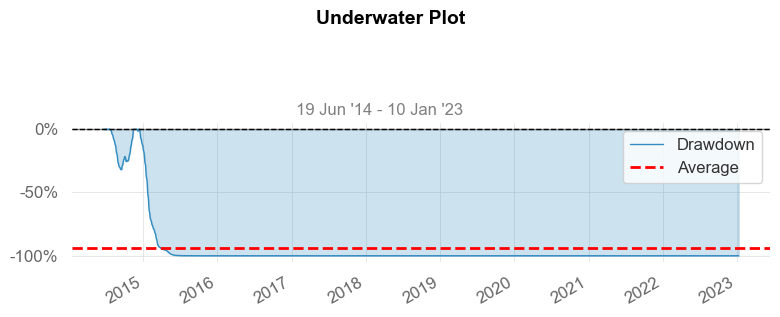

c:\Users\Liso\miniconda3\lib\site-packages\quantstats\stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


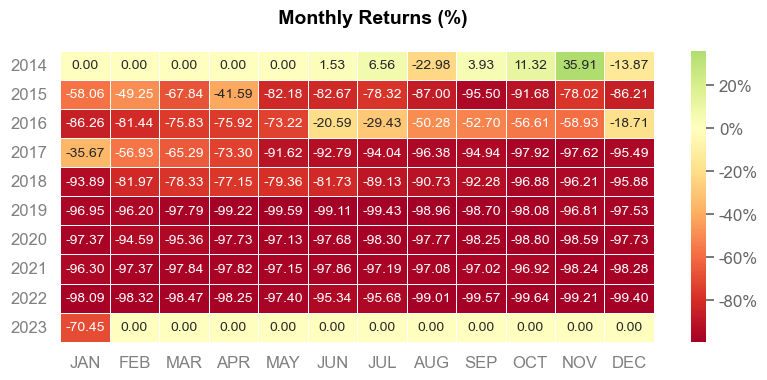

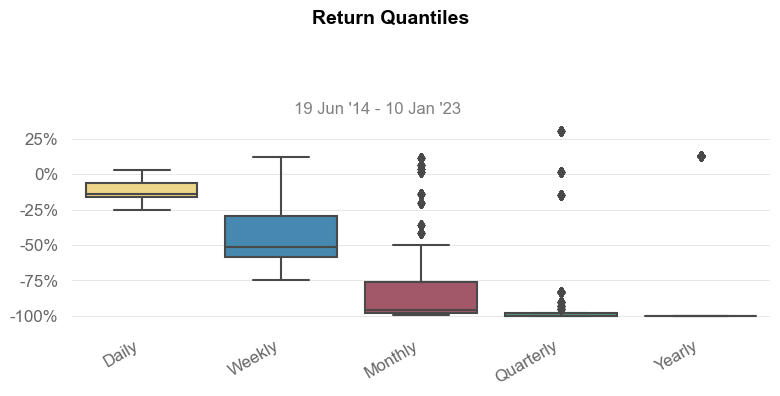

In [ ]:
# performance for both market returns and strategy returns
qs.reports.full(trade_price_EURUSD['Cumulative Market Returns'])
qs.reports.full(trade_price_EURUSD['Cumulative Strategy Returns'])